In [1]:
import pandas as pd
from pathlib import Path
# import matplotlib_venn
import scanpy as sc
import stlearn as st
import anndata as ad
import seaborn as sns
import pickle
from matplotlib import pyplot as plt

In [2]:
# Wiener
BASE_PATH = Path("/scratch/imb/Xiao/")

In [ ]:
# Bunya
BASE_PATH = Path("/scratch/project_mnt/S0010/Xiao")

In [10]:
OUT_PATH = BASE_PATH / "Q1851/Xiao/Wiener_backup/STimage_exp/stimage_LOOCV_liver_selected_gene" / "PLOT"
OUT_PATH.mkdir(parents=True, exist_ok=True)

In [3]:
df = pd.DataFrame()
for file in (BASE_PATH / "Q1851/Xiao/Wiener_backup/STimage_exp/stimage_LOOCV_liver_selected_gene").rglob("stimage*.csv"):
    df = pd.concat([df, pd.read_csv(file, index_col=0)], axis=0)

In [4]:
df

,Gene,Pearson correlation,Slide,Method
0,ISG15,0.228782,C73_B1_VISIUM,STimage
1,TNFRSF18,0.016936,C73_B1_VISIUM,STimage
2,TNFRSF4,0.025054,C73_B1_VISIUM,STimage
3,CALML6,0.015115,C73_B1_VISIUM,STimage
4,HES5,-0.014645,C73_B1_VISIUM,STimage
...,...,...,...,...
1625,FLNA,0.269118,C73_A1_VISIUM,STimage
1626,DNASE1L1,0.150571,C73_A1_VISIUM,STimage
1627,G6PD,0.096252,C73_A1_VISIUM,STimage
1628,IKBKG,0.251643,C73_A1_VISIUM,STimage


<AxesSubplot:xlabel='Slide', ylabel='Pearson correlation'>

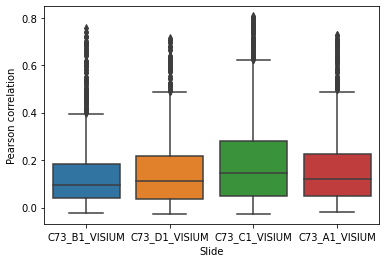

In [5]:
sns.boxplot(x="Slide", y="Pearson correlation", data=df)

In [6]:
top_300gene = df.groupby("Gene")["Pearson correlation"].mean().sort_values(ascending=False)[0:300].index
for i in top_300gene:
    print(i)

APOE
CLU
C1S
SERPING1
C1R
APOB
MGST1
FN1
A2M
AMBP
SAA1
F12
ARG1
B2M
C3
CFB
C9
C4BPA
CTSD
SERPINA1
CD81
MIF
C2
ST6GAL1
PFN1
RHOB
CTSB
C5
HSD11B1
C8G
SDC1
CFI
NTHL1
IGFBP3
C6
NUPR1
PCK1
AQP9
LRP1
C8A
ERRFI1
MASP2
CCL14
MGMT
C8B
CD99
IDH2
STOM
IFITM2
LAMP1
CD63
HLA-E
EFNA1
ID2
SDHA
DDIT4
GNAS
TIMP1
CD14
HSPB1
ZFP36L1
CEBPD
RHOA
PDIA4
MGAT1
SDC2
HSP90B1
RXRA
SDHB
POLD4
NAMPT
XBP1
GADD45G
MYH9
C7
PSMB7
TAPBP
LBP
CEBPA
LGALS1
BNIP3
TOLLIP
STAT2
TNFRSF1A
HMGB1
ZFP36L2
NFKBIA
CXCL12
SDHD
PYGL
HAMP
CTSL
C1QA
IL6ST
GPI
RPN2
IL1RAP
APP
PDIA6
MASP1
BST2
MCL1
CRP
GTF2I
RAC1
SIGIRR
ITGB1
DUSP1
CTSH
GNAI2
VPS28
ENG
RORC
LAMP2
ACTN4
CXCL2
EPAS1
FH
HHEX
LTBR
CD46
MBL2
CTNNB1
ERBB3
SF3B1
C1QB
CD74
CD164
S100A10
IL6R
TXNIP
DEFB1
HDAC6
NEU4
CREB3L3
SRSF2
EIF4A2
CTNNA1
MAP2K1
TNFSF10
CCL16
SHC2
ICAM3
CD4
INSR
IL13RA1
NCOR1
FGFR4
ITGA1
CXCL14
CTNND1
MAF
HSD3B7
DDX3X
ETS2
RBX1
AKT1
STAT6
STAT3
RAF1
ZBTB16
KEAP1
IFNAR1
EIF4EBP1
AKT2
S100A9
HSPA1A
ID3
MAP2K2
ARAF
IRS1
JAK1
VEGFA
GADD45B
TGFBR2
BAD
ANXA2
AR
NOT

In [7]:
# # save pickle
# with open(BASE_PATH / "Q1851/Xiao/Wiener_backup/STimage_exp/stimage_LOOCV_liver_selected_gene/top_300gene.pickle", "wb") as f:
#     pickle.dump(top_300gene, f)

In [8]:
top_100gene = df.groupby("Gene")["Pearson correlation"].mean().sort_values(ascending=False)[0:100].index
df_top100 = df[df["Gene"].isin(top_100gene)]

In [ ]:
# # save pickle
# with open(BASE_PATH / "Q1851/Xiao/Wiener_backup/STimage_exp/stimage_LOOCV_liver_selected_gene/top_100gene.pickle", "wb") as f:
#     pickle.dump(top_100gene, f)

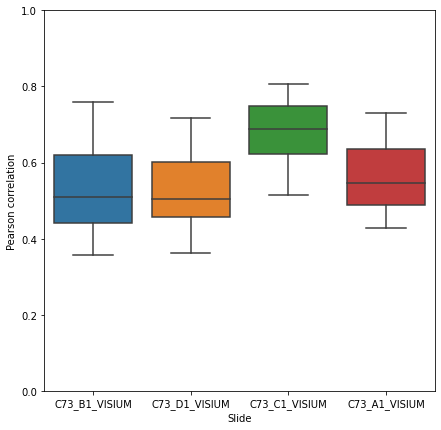

In [18]:
ax, fig = plt.subplots(figsize=(7,7))
sns.boxplot(x="Slide", y="Pearson correlation", data=df_top100)
plt.ylim(0,1)
# save pdf figure
plt.savefig(OUT_PATH / "top_100gene.pdf")
# plt.show()

In [10]:
# imgrow
(8373 - 8271)*0.20635575 / 100 * 55 / 2

5.7882787874999995

In [11]:
# col
(1211 - 1035)*0.20635575 / 100 * 55 / 2

9.9876183